In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
bdlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/bangladesh_livechat_data.parquet')
# brlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/brasil_livechat_data.parquet')
# idlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/indonesia_livechat_data.parquet')
# mllc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/malaysia_livechat_data.parquet')

# bdlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/pakistan_livechat_data.parquet')
# indlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/india_livechat_data.parquet')
# ind2lc = pd.read_parquet('/kaggle/input/esports-data/live_comments/indiav2_livechat_data.parquet')
# trlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/turkey_livechat_data.parquet')
# vnlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/vietnam_livechat_data.parquet')

In [4]:
# tqdm.pandas()
# bdlc['new'] = bdlc.message.progress_apply(translate_text)

In [5]:
# bdlc = pd.concat([indlc, ind2lc], ignore_index=True)

In [6]:
# dfs_lc = ['bdlc', 'idlc', 'mllc', 'pklc', 'inlc', 'vnlc']
# sm = 0
# for df_name in dfs_lc:
#     df = globals()[df_name]
#     print(f"Length of {df_name}: {len(df)/1e6:.2f}M")
#     sm+=len(df)

# print(f'Total is {sm/1e6:.2f}M')
# print(f'Total in crore {sm/1e7:.2f}Corer')

## Bangladesh

In [7]:
import emoji

def replace_emoji_codes(text):
    """
    Replace text-based emoji codes with actual emojis using the `emoji` library.

    Parameters:
    - text (str): The input text containing emoji codes.

    Returns:
    - str: The text with emoji codes replaced by actual emojis.
    """
    # Convert text-based emoji codes to actual emojis
    return emoji.emojize(text)

# Example usage
text = "A1 :red_heart: A1 :red_heart:"
converted_text = replace_emoji_codes(text)
print(converted_text)  # Output: "A1 ❤️ A1 ❤️"

import re

def count_words(text):
    # Remove punctuations using regular expression
    text_without_punctuations = re.sub(r'[^\w\s]', '', text)

    # Split the text into words based on whitespace characters
    words = text_without_punctuations.split()

    # Get the number of words
    word_length = len(words)

    return word_length


A1 ❤️ A1 ❤️


In [8]:
tqdm.pandas()

In [9]:
bdlc['wordcount'] = bdlc.message.progress_apply(count_words)

bdlc = bdlc.sort_values(by='wordcount', ascending=False).reset_index(drop=True)

100%|██████████| 2796193/2796193 [00:22<00:00, 122241.25it/s]


In [10]:
bdlc.tail()

,datetime,author,message,video_id,wordcount
2796188,2024-02-23 15:11:55,View point,,hU7l6F1txrU,0
2796189,2024-02-23 15:11:11,GO ON,,hU7l6F1txrU,0
2796190,2024-02-23 15:10:30,virus Labib yt,,hU7l6F1txrU,0
2796191,2024-02-23 15:09:07,I'm SaHiL,,hU7l6F1txrU,0
2796192,2024-02-23 15:09:09,virus Labib yt,,hU7l6F1txrU,0


## Checkpoint for filter

In [11]:
th = 200_000


filt = bdlc[:th].copy()
filt.head()

,datetime,author,message,video_id,wordcount
0,2021-03-27 12:34:10,Tanzin Mahamud,A1 :red_heart: A1 :red_heart: A1 :red_heart: A...,4D5QvYnU3cs,80
1,2021-03-27 12:49:48,Tanzin Mahamud,A1 :red_heart: A1 :red_heart: A1 :red_heart: A...,4D5QvYnU3cs,80
2,2021-03-27 12:53:52,Tanzin Mahamud,A1 :red_heart: A1 :red_heart: A1 :red_heart: A...,4D5QvYnU3cs,80
3,2021-03-27 13:05:37,Tanzin Mahamud,A1 :red_heart: A1 :red_heart: A1 :red_heart: A...,4D5QvYnU3cs,80
4,2021-03-27 12:31:21,Tanzin Mahamud,A1 :red_heart: A1 :red_heart: A1 :red_heart: A...,4D5QvYnU3cs,80


In [12]:
filt['message'] = filt.message.progress_apply(replace_emoji_codes)

# filt = filt[filt['wordcount'] >= 2]

filt.tail()

100%|██████████| 200000/200000 [00:03<00:00, 59140.12it/s]


,datetime,author,message,video_id,wordcount
199995,2021-08-15 11:41:01,raiyan 68c,"জসিম ফ্যানেরা হেইট দিতেসে না কাউকে, a1 এর চিকে...",5hPFiTzXcZI,13
199996,2021-03-30 14:15:37,MAHADI PLAYS,"sadia❣️Sadia ❣️sadia ❣️sadia, ❣️sadia❣️Sadia ❣...",UZlNkHUFA-c,13
199997,2021-02-16 11:44:54,Shahriar Amin,NEXT MATCH SOB WILL BE BACK WITH THEIR MAGIC M...,6vitPgmUfNc,13
199998,2021-08-19 14:14:58,Arafat Hassan,@Farhan Shahriar AHARE MALLU KOTHA NA PAIRA EK...,zDb6S_QFG8Q,13
199999,2021-08-19 14:14:59,Arafat Hassan,@Farhan Shahriar AHARE MALLU KOTHA NA PAIRA EK...,zDb6S_QFG8Q,13


In [13]:
print(bdlc.shape)
print(filt.shape)

(2796193, 5)
(200000, 5)


In [14]:
filt['datetime'] = pd.to_datetime(filt['datetime'])

# Extract the year and create a new column 'year'
filt['year'] = filt['datetime'].dt.year

filt.year.value_counts()

year
2021    114857
2022     44845
2020     23607
2023     11197
2024      5339
2019       155
Name: count, dtype: int64

In [15]:
(365532/1998563)*100

18.28974117903714

In [16]:
(24544/100000)*100

24.544

In [17]:
# tqdm.pandas()
# filt['message'] = filt.message.progress_apply(replace_emoji_codes)
# filt.head(2)

In [18]:
filt.wordcount.describe()

count    200000.000000
mean         20.146700
std           7.059691
min          13.000000
25%          15.000000
50%          18.000000
75%          24.000000
max          80.000000
Name: wordcount, dtype: float64

In [19]:
# filt['message'][61224]

In [20]:
import torch
print(torch.cuda.is_available())  # Should print True if GPU is available
print(torch.cuda.current_device())  # Prints the ID of the current device
print(torch.cuda.get_device_name(0))  # Prints the name of the GPU

True
0
Tesla T4


In [21]:
model_path = 'cardiffnlp/twitter-roberta-base-sentiment-latest'

In [22]:
from transformers import pipeline
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path, device=0)
sentiment_task("Covid cases are increasing fast!")

2024-09-19 12:22:50.613828: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-19 12:22:50.613945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 12:22:50.798551: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

[{'label': 'negative', 'score': 0.7235766649246216}]

In [23]:
def make_pred(text):
    try:
        return sentiment_task(text)[0]['label']
    except:
        return 'neutral'
make_pred('i love you.')

'positive'

In [24]:
xt = filt['message'][6125]
make_pred(xt)

'neutral'

In [25]:
filt['sentiment'] = filt.message.progress_apply(make_pred)

100%|██████████| 200000/200000 [47:40<00:00, 69.93it/s]


In [26]:
filt.sentiment.value_counts()

sentiment
neutral     138580
negative     36423
positive     24997
Name: count, dtype: int64

In [27]:
filt.tail()

,datetime,author,message,video_id,wordcount,year,sentiment
199995,2021-08-15 11:41:01,raiyan 68c,"জসিম ফ্যানেরা হেইট দিতেসে না কাউকে, a1 এর চিকে...",5hPFiTzXcZI,13,2021,neutral
199996,2021-03-30 14:15:37,MAHADI PLAYS,"sadia❣️Sadia ❣️sadia ❣️sadia, ❣️sadia❣️Sadia ❣...",UZlNkHUFA-c,13,2021,neutral
199997,2021-02-16 11:44:54,Shahriar Amin,NEXT MATCH SOB WILL BE BACK WITH THEIR MAGIC M...,6vitPgmUfNc,13,2021,positive
199998,2021-08-19 14:14:58,Arafat Hassan,@Farhan Shahriar AHARE MALLU KOTHA NA PAIRA EK...,zDb6S_QFG8Q,13,2021,negative
199999,2021-08-19 14:14:59,Arafat Hassan,@Farhan Shahriar AHARE MALLU KOTHA NA PAIRA EK...,zDb6S_QFG8Q,13,2021,negative


In [28]:
# make_pred('বালের খেলা করো। ফালতু যতসব। ')

In [29]:
filt.year.value_counts()

year
2021    114857
2022     44845
2020     23607
2023     11197
2024      5339
2019       155
Name: count, dtype: int64

In [30]:
grouped = filt.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

In [31]:
grouped

sentiment,negative,neutral,positive
year,,,
2019,14,111,30
2020,3811,18165,1631
2021,22986,77812,14059
2022,7228,30231,7386
2023,1697,8126,1374
2024,687,4135,517


In [32]:
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_percentage

sentiment,negative,neutral,positive
year,,,
2019,9.032258,71.612903,19.354839
2020,16.143517,76.947516,6.908968
2021,20.012711,67.746850,12.240438
2022,16.117739,67.412198,16.470064
2023,15.155845,72.573011,12.271144
2024,12.867578,77.448960,9.683461


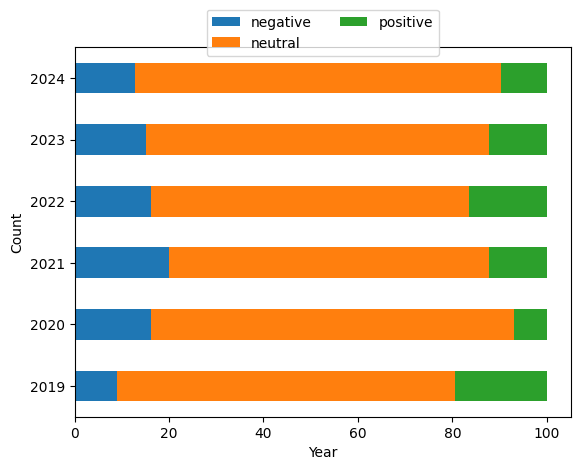

In [33]:
# Plotting the stacked bar chart
grouped_percentage.plot(kind='barh', stacked=True)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
# plt.title('Sentiment Distribution by Year')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)

# Display the plot
plt.show()

In [34]:
# from transformers import pipeline
# from datasets import Dataset
# # import pandas as pd
# # Example data
# data = {
#     'text': [
#         "Covid cases are increasing fast!",
#         "I am feeling great today!",
#         "This is a terrible situation.",
#         # Add more examples as needed
#     ]
# }
# df = pd.DataFrame(data)
# dataset = Dataset.from_pandas(df)

# dataset

In [35]:

# # Define the function to analyze sentiments
# def analyze_sentiments(batch):
#     results = sentiment_task(batch['message'])
#     return {'sentiment': [result['label'] for result in results],
#             'score': [result['score'] for result in results]}

In [36]:





# # Apply sentiment analysis to the dataset
# results_dataset = dataset.map(analyze_sentiments, batched=True)

# # # Convert results to a DataFrame
# results_df = pd.DataFrame(results_dataset)

# # # Print results
# # print(results_df.head())


In [37]:
# results_df

In [38]:
# dataset = Dataset.from_pandas(filt)
# dataset

In [39]:
# results_dataset = dataset.map(analyze_sentiments, batched=True)